In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

from sklearn.model_selection import train_test_split

from scipy import stats
from sklearn.linear_model import LinearRegression

#Feature Selection
from sklearn.feature_selection import SelectKBest, f_regression, RFE

from prepare import *

In [111]:
class Attitudes_explore():
    '''
    Performs a series of analyses and explore functions on various features in our data.
    '''
    
    def __init__(self, df: pd.DataFrame, target: str):
        '''
        Initializes the self of the class.
        '''
        self.target = target
        
        # Pull the categorical features from dataframe
        self.categorical_features = df.drop(columns = ['qkey', "weight", target]).columns.to_list()
        
        # Split the dataframe
        train, validate, test = train_validate_test_split(df, target)
        
        # Make train datasets
        self.X_train = train.drop(columns=[target])
        self.y_train = train[target]
        
        # Make validate datasets
        self.X_validate = validate.drop(columns=[target])
        self.y_validate = validate[target]
        
        # Make test datasets
        self.X_test = test.drop(columns=[target])
        self.y_test = test[target]
        
        
        
    def run_statistical_tests(self):
        '''This method will iterate though the categorical feature columns and run various statistical tests
        and will print the results for each test.
        The tests being performed are:
        chi_squared
        significant_p_val
        list_significant_columns
        insignificant_p_val
        list_insignificant_columns
        '''
        
        # Create column_based_dict statistic attributes
        self.chi2_df = pd.DataFrame(columns=['chi2', 'p_val', 'deg_free', 'expected_freq'])
        
        # Iterate through the categorical features
        for col in self.categorical_features:
            
            #Create contingency table
            contingency_table = pd.crosstab(self.X_train[col], self.y_train)
            
            #Get test results of chi-squared test
            chi2, p, deg_free, expect_freq = stats.chi2_contingency(contingency_table)
            # Add to the dataframe
            self.chi2_df.loc[col]= [chi2, p, deg_free, expect_freq]
    
    def plot_bar_graphs(self, n=5, saved=False):
        '''Plots the target and each variable for top 'n' results from the chi2 test
        '''
        # Select the n most relevant p_vals
        for col in self.chi2_df.head(n).index:
            sns.barplot(x = self.y_train, y = self.X_train[col]).set_title(
            label = f'Percent {self.target} by {col}')
            if saved:
                plt.savefig(f'images/{col.lower()}_bar_plot.png')
            plt.show()

In [36]:
df, revert_key, replace_key = wrangle_data()

In [112]:
# This will drop the columns that you don't want to target yet
tmp = df[[col for col in df.columns if col not in ['pes_val', 'is_very_pes', 'is_very_opt']]]

female_subset = df[df.sex == 'Female']

# Create instance
obj = Attitudes_explore(tmp, target='is_pes')

In [113]:
# Create accessable dict results
obj.run_statistical_tests()

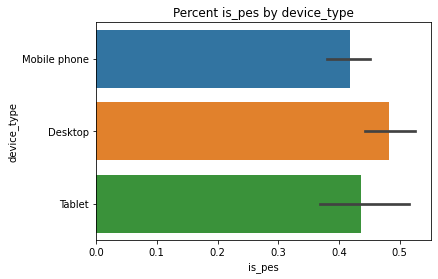

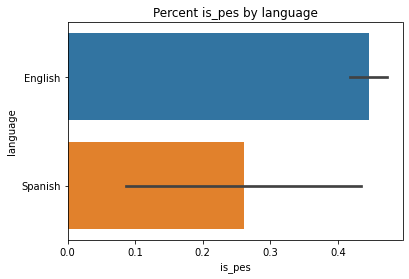

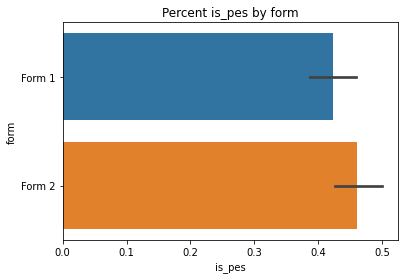

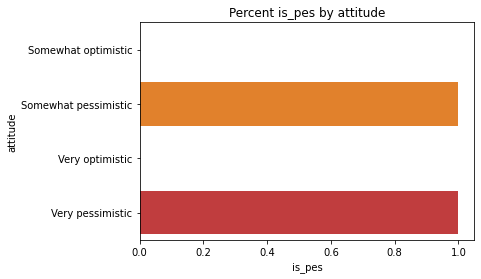

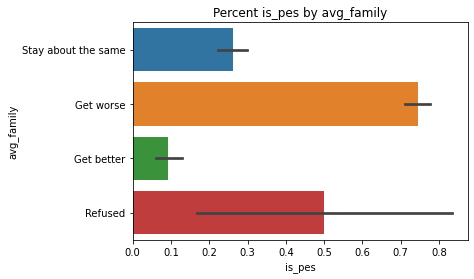

In [114]:
obj.plot_bar_graphs(saved=True)